<font color='red' size="5"> <b>Slide 4: Tiền xử lý dữ liệu </b></font> 

# Xử lý dữ liệu khuyết thiếu

# Xử lý dữ liệu ngoại lai

# Chuẩn hóa dữ liệu

# Mã hóa (encoding) dữ liệu

**Tại sao cần mã hóa?**  
- **Hầu hết các thuật toán học máy gần như chỉ làm việc với dữ liệu dạng số**
- **Dữ liệu còn có dạng phân loại (categorical)**  
- **Xử lý dữ liệu phân loại phải đối mặt với sự phức tạp của ngữ nghĩa, bối cảnh liên quan đến từng category hoặc type của dữ liệu**  
  
**Các kiểu dữ liệu phân loại:**  
- **Định danh (norminal)**  
- **Thứ tự (ordinal)**

**Dữ liệu phân loại định danh**   

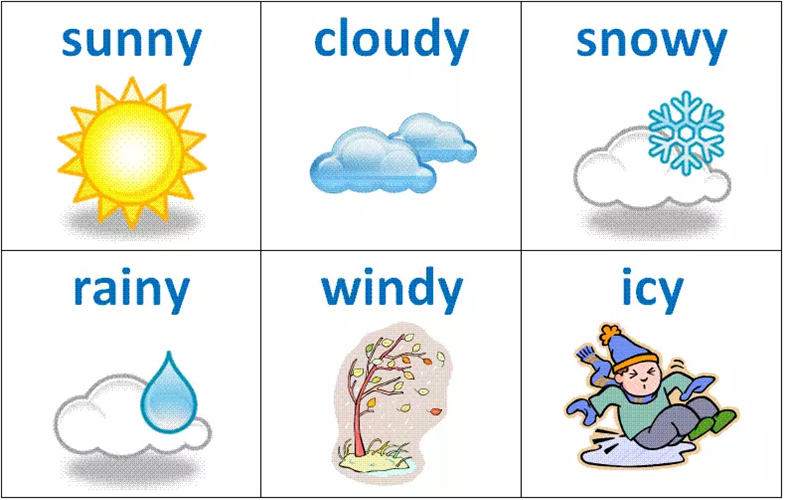

**Dữ liệu phân loại thứ tự**   

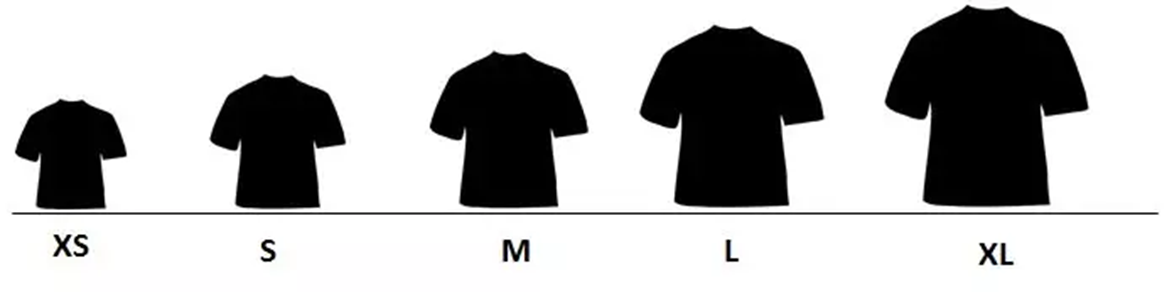

## One-hot encoding

**Biến đổi từng giá trị thành các đặc trưng nhị phân chỉ chứa giá trị 0 hoặc 1  
Mỗi thuộc tính sẽ được biến đổi thành 1 biến vector (numpy) có kích thước m = unique().count() của thuộc tính  
Tại mỗi dòng, chỉ có 1 giá trị bằng 1, các giá trị còn lại đều bằng 0**

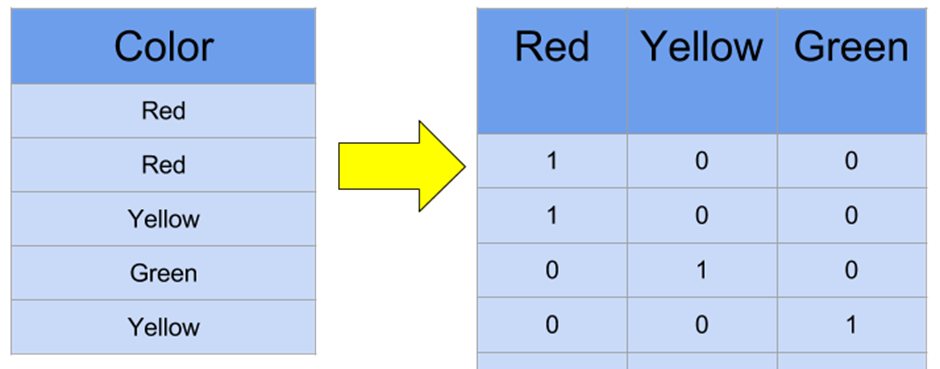

**Ví dụ: Encode chuỗi ['red', 'red', 'yellow', 'green', 'yellow']**

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

list_ = ['red', 'red', 'yellow', 'green', 'yellow']
print(list_)

#Biến list thành dataframe
data = pd.DataFrame(list_, columns=['color'])
display(data)

#Encoding cột color
encoder = OneHotEncoder(sparse=False) #Tạo object encoder
#Mặc định sắp xếp theo alphabet
#encoder.categories = [np.array(['red', 'yellow', 'green'])] #Nếu muốn thứ tự các cột theo ý muốn
onehot = encoder.fit_transform(data)
print(onehot)

['red', 'red', 'yellow', 'green', 'yellow']


,color
0,red
1,red
2,yellow
3,green
4,yellow


[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [8]:
pd.get_dummies(data) #Dùng hàm get_dummies() của pandas

,color_green,color_red,color_yellow
0,0,1,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,0,1


## Label encoding

**Thay thế giá trị phân loại bằng một giá trị số trong khoảng từ 0 đến (unique().count() - 1).  
Cách mã hóa này đơn giản, không tạo ra nhiều dữ liệu dư thừa như one-hot encoding   
Ví dụ: nếu có 5 lớp thì ta sẽ sử dụng các các giá trị là (0, 1, 2, 3, 4).**  
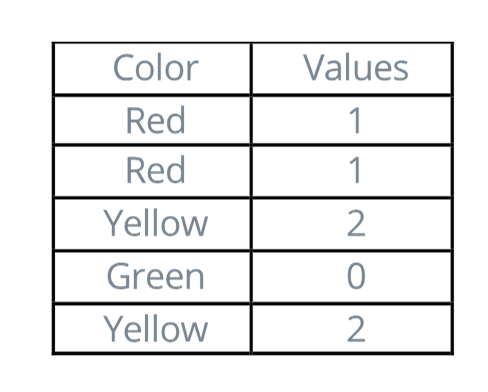

In [9]:
data

,color
0,red
1,red
2,yellow
3,green
4,yellow


In [12]:
#Dùng sklearn
#Dùng cho dữ liệu 1 chiều
from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder() #Đặt object
lb = encoder1.fit_transform(data.loc[:,'color']) #Dùng cho dữ liệu 1 chiều
print(lb) 

[1 1 2 0 2]


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   color   5 non-null      object
dtypes: object(1)
memory usage: 168.0+ bytes


In [18]:
#Dùng hàm của pandas
#Chỉ dùng cho Series
#Phải ép kiểu về 'category'
data2 = data.loc[:,'color'].astype('category').cat.codes
data2

0    1
1    1
2    2
3    0
4    2
dtype: int8

In [20]:
list2 = ['red', 'green', 'pink', 'yellow', 'orange', 'green','red', 'yellow']
#Hãy encode list trên theo 3 cách
#1. Sử dụng sklearn
#2. Sử dụng hàm có sẵn của pandas
#3. Làm thủ công, xuất ra 1 cột mới bên cạnh cột color, giá trị xuất phát từ 1

In [22]:
#Cách 1
encoder = LabelEncoder()
lb = encoder.fit_transform(['red', 'green', 'pink', 'yellow', 'orange', 'green', 'red', 'yellow'])
print(lb)

[3 0 2 4 1 0 3 4]


In [23]:
#Cách 2
s = pd.Series(['red', 'green', 'pink', 'yellow', 'orange', 'green', 'red', 'yellow'])
rs= s.astype('category').cat.codes
print(rs)

0    3
1    0
2    2
3    4
4    1
5    0
6    3
7    4
dtype: int8


In [24]:
#Cách 3
d = {'green': 1, 'orange':2, 'pink': 3, 'red': 4, 'yellow': 5}
list3 = []
for i in list2:
    list3.append(d[i])
print(list3)

[4, 1, 3, 5, 2, 1, 4, 5]


In [27]:
#Cách 3
data_1 = pd.DataFrame(list2, columns=['color'])
import numpy as np
conditions = [data_1['color'] == 'green',
              data_1['color'] == 'orange',
              data_1['color'] == 'pink',
              data_1['color'] == 'red',
              data_1['color'] == 'yellow']
choices = [1,2,3,4,5]
data_1['Encoder'] = np.select(conditions,choices,default = 'NaN')
display(data_1)

,color,Encoder
0,red,4
1,green,1
2,pink,3
3,yellow,5
4,orange,2
5,green,1
6,red,4
7,yellow,5


In [29]:
list2 = ['red', 'green', 'pink', 'yellow', 'orange', 'green','red', 'yellow']

data = pd.DataFrame(list2, columns=['Color'])
d = {}

#Danh sách mã hóa theo thứ tự xuất hiện
mahoa = 1
for i in list2:
    if i not in d:
        d[i] = mahoa
        mahoa += 1
print(d)

#Chính thức mã hóa
lst = []
for i in list2:
    lst.append(d[i])

data['Mahoa'] = lst

print(data)

{'red': 1, 'green': 2, 'pink': 3, 'yellow': 4, 'orange': 5}
    Color  Mahoa
0     red      1
1   green      2
2    pink      3
3  yellow      4
4  orange      5
5   green      2
6     red      1
7  yellow      4


In [31]:
#Cách 3.4
list2 = pd.Series(list2)
list3 = list2.astype('category').cat.codes

pd.get_dummies(list2)

dfnew = list2
dfnew = pd.concat([dfnew, list3], axis=1)
dfnew
#Sai đề 1 xíu

,0,1
0,red,3
1,green,0
2,pink,2
3,yellow,4
4,orange,1
5,green,0
6,red,3
7,yellow,4


In [41]:
#Cách 3.5
dat1 = pd.DataFrame(list2, columns=['color']) #Tạo ra DataFrame chưa cột color
u = dat1.iloc[:,0].unique() #Lọc ra 1 list chứa các giá trị màu sắc
dat1.loc[:,'encoded'] = 0 #Tạo ra 1 cột mới là encoded có giá trị =0
for index, value in enumerate(u):
    dat1.loc[dat1.loc[:,'color']==value,'encoded'] = index+1
dat1

,color,encoded
0,red,1
1,green,2
2,pink,3
3,yellow,4
4,orange,5
5,green,2
6,red,1
7,yellow,4


## Ordinal encoding

**Dùng để mã hóa những đặc trưng phân loại thành một giá trị số thứ tự.  
Cách tiếp cận này biến đổi giá trị phân loại thành giá trị số trong các tập hợp có thứ tự.  
Gần tương tự như Label encoding. Tuy nhiên sẽ chỉ định một chuỗi các giá trị số theo thứ tự dữ liệu.** 

**Ví dụ: Giả sử ta có Dataframe chứa giá trị hài lòng của các khách hàng theo 5 mức là: excellent (xuất sắc), very_good (rất tốt), good (tốt), normal (bình thường), bad (tồi tệ). Ta muốn mức hài lòng càng cao thì giá trị mã hóa càng lớn**

In [20]:
from sklearn.preprocessing import OrdinalEncoder

list3 = ['excellent', 'very_good', 'good', 'normal', 'bad']
print(list3)

dat3 = pd.DataFrame(list3, columns=['rate'])
display(dat3)

encoder3 = OrdinalEncoder()
oe = encoder3.fit_transform(dat3)
print(oe) 
print('Mặc định, thứ tự sắp xếp theo abc')

['excellent', 'very_good', 'good', 'normal', 'bad']


,rate
0,excellent
1,very_good
2,good
3,normal
4,bad


[[1.]
 [4.]
 [2.]
 [3.]
 [0.]]
Mặc định, thứ tự sắp xếp theo abc


In [21]:
print(list3.reverse())
print(list3)

None
['bad', 'normal', 'good', 'very_good', 'excellent']


In [22]:
# list_.reverse()
encoder3.categories = [np.array(list3)]
oe2 = encoder3.fit_transform(dat3)
print(oe2)  

[[4.]
 [3.]
 [2.]
 [1.]
 [0.]]


# Rời rạc hóa dữ liệu

**Quá trình biến đổi các biến, mô hình hoặc hàm liên tục thành một dạng rời rạc.  
Chúng ta thực hiện điều này bằng cách tạo một tập hợp các khoảng liền kề trên phạm vi của biến/mô hình/hàm chúng ta mong muốn.  
Dữ liệu liên tục dùng để đo, trong khi dữ liệu rời rạc dùng để đếm.**

## Hàm pandas.cut()

- **Được sử dụng để tách các phần tử thành các nhóm khác nhau.**  
- **được sử dụng chủ yếu để thực hiện phân tích thống kê trên dữ liệu vô hướng.**

**Ví dụ: rời rạc hóa chuỗi sau:  
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]**

In [185]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

#Chia theo nhóm định sẵn
bins = [18, 25, 35, 60, 100]  #định nghĩa khoảng giá trị các nhóm

cats = pd.cut(ages, bins) # rời rạc hóa ages theo các khoảng trong bins
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [188]:
type(cats)

pandas.core.arrays.categorical.Categorical

In [186]:
# lấy ra index của nhóm tương ứng với các phần tử
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [165]:
# lấy ra các nhóm
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [166]:
# thống kê số lượng phần tử ở mỗi nhóm
pd.value_counts(cats)

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [189]:
# Dán nhãn cho các nhóm
# danh sách nhãn
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

cats = pd.cut(ages, bins, labels=group_names)
cats

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [190]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [191]:
cats.categories

Index(['Youth', 'YoungAdult', 'MiddleAged', 'Senior'], dtype='object')

In [192]:
#Chia thành n nhóm có độ dài bằng nhau
cats = pd.cut(ages, 4) #Ví dụ n=4
cats

[(19.959, 30.25], (19.959, 30.25], (19.959, 30.25], (19.959, 30.25], (19.959, 30.25], ..., (30.25, 40.5], (50.75, 61.0], (40.5, 50.75], (40.5, 50.75], (30.25, 40.5]]
Length: 12
Categories (4, interval[float64, right]): [(19.959, 30.25] < (30.25, 40.5] < (40.5, 50.75] < (50.75, 61.0]]

In [169]:
cats.value_counts()

(19.959, 30.25]    6
(30.25, 40.5]      3
(40.5, 50.75]      2
(50.75, 61.0]      1
dtype: int64

## Hàm pandas.qcut()

**Hàm qcut chia dữ liệu dựa trên các điểm phân vị (quantile).  
Tùy thuộc vào sự phân bố của dữ liệu, việc sử dụng cut thường không dẫn đến việc mỗi nhóm có cùng số lượng dữ liệu.  
Vì qcut sử dụng các điểm phân vị, nên chúng sẽ nhận được các nhóm có kích thước (gần) bằng nhau.**

In [193]:
#Chia thành n nhóm có độ dài bằng nhau
cats = pd.qcut(ages, 4) #Ví dụ n=4
cats

[(19.999, 22.75], (19.999, 22.75], (22.75, 29.0], (22.75, 29.0], (19.999, 22.75], ..., (29.0, 38.0], (38.0, 61.0], (38.0, 61.0], (38.0, 61.0], (29.0, 38.0]]
Length: 12
Categories (4, interval[float64, right]): [(19.999, 22.75] < (22.75, 29.0] < (29.0, 38.0] < (38.0, 61.0]]

In [171]:
cats.value_counts()

(19.999, 22.75]    3
(22.75, 29.0]      3
(29.0, 38.0]       3
(38.0, 61.0]       3
dtype: int64

# Thực hành

In [195]:
# Thực hành bộ dữ liệu FoodPrice

In [47]:
data1 = pd.read_csv('FoodPrice_in_Turkey.csv', header=0)
data1

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985


In [48]:
# mã hóa cột ProductName với One-hot encoder sử dụng sklearn
en1 = OneHotEncoder(sparse=False)
encoded1 = en1.fit_transform(data1.loc[:,['ProductName']]) #Lấy series
encoded1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [49]:
aaa = np.array(data1.loc[:,'ProductName'])
aaa

array(['Rice - Retail', 'Rice - Retail', 'Rice - Retail', ...,
       'Cocoa (powder) - Retail', 'Cocoa (powder) - Retail',
       'Cocoa (powder) - Retail'], dtype=object)

In [50]:
aaa.shape

(7381,)

In [209]:
bbb = aaa.reshape(-1,1)
bbb

array([['Rice - Retail'],
       ['Rice - Retail'],
       ['Rice - Retail'],
       ...,
       ['Cocoa (powder) - Retail'],
       ['Cocoa (powder) - Retail'],
       ['Cocoa (powder) - Retail']], dtype=object)

In [210]:
encoded2 = en1.fit_transform(bbb)
encoded2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [211]:
encoded2.shape

(7381, 52)

In [214]:
data1.loc[:,'ProductName'].unique().size

52

In [215]:
# mã hóa cột ProductName với One-hot encoder sử dụng pandas

pd.get_dummies(data1.loc[:,'ProductName'])

,Apples (red) - Retail,Apples - Retail,Bananas - Retail,Beans (white) - Retail,Bread (common) - Retail,Bread (pita) - Retail,Bulgur - Retail,Cabbage - Retail,Cauliflower - Retail,Cheese - Retail,...,Tea (herbal) - Retail,Tea - Retail,Tomatoes (paste) - Retail,Tomatoes - Retail,Transport (public) - Retail,"Wage (non-qualified labour, non-agricultural) - Retail",Water - Retail,Wheat flour - Retail,Yogurt - Retail,Zucchini - Retail
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# mã hóa cột ProductName với Label encoder sử dụng scikit learn

In [216]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Khai báo biến (object) thuộc class (lớp) LabelEncoder
en2 = LabelEncoder()
encoded3 = en2.fit_transform(data1.loc[:,'ProductName'])
encoded3

array([37, 37, 37, ..., 11, 11, 11])

In [218]:
encoded3.shape

(7381,)

In [ ]:
# mã hóa cột ProductName với Label encoder sử dụng pandas

In [219]:
#Nhớ ép type của cột về category

data1.loc[:,'ProductName'].astype('category').cat.codes

0       37
1       37
2       37
3       37
4       37
        ..
7376    11
7377    11
7378    11
7379    11
7380    11
Length: 7381, dtype: int8

In [ ]:
# Rời rạc hóa dữ liệu ở cột Price 

In [220]:
## chia thành 5 khoảng giá trị có độ dài bằng nhau

ccc = pd.cut(data1.loc[:,'Price'], 5) #5 khoảng
ccc

0       (0.0947, 32.092]
1       (0.0947, 32.092]
2       (0.0947, 32.092]
3       (0.0947, 32.092]
4       (0.0947, 32.092]
              ...       
7376    (32.092, 63.931]
7377    (32.092, 63.931]
7378    (32.092, 63.931]
7379    (32.092, 63.931]
7380    (32.092, 63.931]
Name: Price, Length: 7381, dtype: category
Categories (5, interval[float64, right]): [(0.0947, 32.092] < (32.092, 63.931] < (63.931, 95.769] < (95.769, 127.607] < (127.607, 159.446]]

In [221]:
#Số lượng phần tử trong mỗi nhóm
ccc.value_counts()

(0.0947, 32.092]      6223
(32.092, 63.931]       867
(63.931, 95.769]       155
(95.769, 127.607]      105
(127.607, 159.446]      31
Name: Price, dtype: int64

In [222]:
pd.value_counts(ccc)

(0.0947, 32.092]      6223
(32.092, 63.931]       867
(63.931, 95.769]       155
(95.769, 127.607]      105
(127.607, 159.446]      31
Name: Price, dtype: int64

In [223]:
## chia thành 5 phần có số lượng phần tử tương đương nhau

ddd = pd.qcut(data1.loc[:,'Price'], 5)
ddd

0          (2.837, 4.649]
1          (2.837, 4.649]
2           (4.649, 8.19]
3           (4.649, 8.19]
4           (4.649, 8.19]
              ...        
7376    (27.676, 159.446]
7377    (27.676, 159.446]
7378    (27.676, 159.446]
7379    (27.676, 159.446]
7380    (27.676, 159.446]
Name: Price, Length: 7381, dtype: category
Categories (5, interval[float64, right]): [(0.253, 2.837] < (2.837, 4.649] < (4.649, 8.19] < (8.19, 27.676] < (27.676, 159.446]]

In [224]:
ddd.value_counts()

(0.253, 2.837]       1477
(2.837, 4.649]       1476
(4.649, 8.19]        1476
(8.19, 27.676]       1476
(27.676, 159.446]    1476
Name: Price, dtype: int64

In [225]:
en2 = LabelEncoder()
encoded3 = en2.fit_transform(data1.loc[:,'Place'])
encoded3

array([3, 3, 3, ..., 2, 2, 2])